<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/practice_final/Insurance_Sanctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title **Imports** { display-mode: "form" }
import jax 
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp 
from functools import partial 
from functools import partial 
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

- "The Group of Seven nations, meanwhile, put a ceiling on other sales by barring Western companies from insuring, financing or shipping Russian crude at above $60 a barrel" -[wsj](https://www.wsj.com/articles/russian-oil-price-cap-adds-to-fiscal-pressure-on-moscow-11670409002)

In [2]:
#@title **Exogenous Variables** { display-mode: "form" }
cost_of_insurance = 10.0 # Per Quantity
cost_of_spill = 15000.0 # Per Quantity
amt_covered = 14500.0 # Per Quantity
marginal_cost_production = 40 
price_sold = 60.0

In [3]:
#@title **Cost** { display-mode: "form" }
def cost(insurance, q, w):
  cost_of_purchase_oil = marginal_cost_production*q                                               # Cost of purchasing oil
  cost_insured = cost_of_purchase_oil   + cost_of_insurance*q + (cost_of_spill-amt_covered)*(w==1)*q
  cost_uninsured = cost_of_purchase_oil +        0          +  cost_of_spill*(w==1)*q
  return jnp.where(insurance==1, cost_insured, cost_uninsured)

In [4]:
#@title **Revenue** { display-mode: "form" }
def revenue(q, w):
  return price_sold*q*(w==0) 

In [5]:
#@title **Profit** { display-mode: "form" }
def profit(insurance, q, w):
  return revenue(q, w) - cost(insurance, q, w)

In [6]:
#@title **Expected Profit** { display-mode: "form" }
def expected_gain(insurance, q):
  f = partial(profit, insurance, q)                         # Partially evaluate function 
  f_vec = jax.vmap(f)                                       # Vectorize function
  key = jax.random.PRNGKey(0)                               # Keys 
  ws = jax.random.choice(key, a = jnp.array([0., 1.]), shape=(5000,), p=jnp.array([0.99, 0.01]))
  values = f_vec(ws)
  return jnp.mean(values)

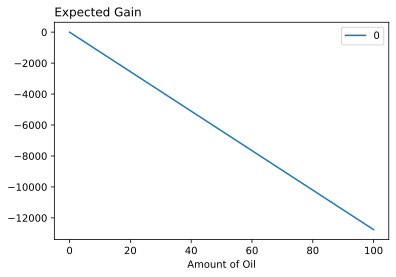

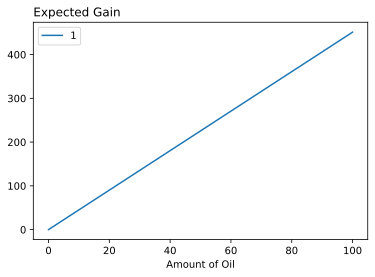

In [7]:
#@title **Plot**
qs = jnp.linspace(0, 100, 100)                  # Vector of quantities 
for i in [0, 1]:
  f = partial(expected_gain, i)                 # Partially Evaluate the Function
  f_vec = jax.vmap(f)                           # Vectorize the function 
  cs = f_vec(qs)
  plt.plot(qs, cs, label=i)
  plt.title('Expected Gain', loc='left')
  plt.xlabel('Amount of Oil')
  plt.legend()
  plt.show()